Final Project Submission

Please fill out:
* Student name: JESSYCA APERI
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 5/2/2023
* Instructor name: Samwel Jane
* Blog post URL: https://github.com/aperi-j/phase_01_PROJECT

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import statistics
import warnings


%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

# My first problem statement is: The movie genre with the highest profits and in both domestic market and worldwide. For these I will use the csv files containing information on budgets and gross income generated from both domestic and foreign markets and the csv file with movie genres.

In [2]:
#Dataset with information on genres
title_basics = pd.read_csv('imdb.title.basics.csv.gz')
title_basics_df = pd.DataFrame(title_basics)
title_basics_df


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [3]:
#Dataset with information on budgets and income
movie_budget = pd.read_csv('tn.movie_budgets.csv.gz')
movie_budget_df = pd.DataFrame(movie_budget)
movie_budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


# Exploring the data

# Analysing the title_basics_df dataset

In [4]:
title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


 * In this dataset, I am only interested in the genres column and primary title so I will target their missing values.
 
 *I will drop the columns I don't need for this part of the analysis
 * The other columns I will retain will be used in future parts of the analysis

# Dealing with missing values

In [5]:
title_basics_df.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [6]:
title_basics_df.drop([ 'original_title', 'start_year'], 
                     axis = 1, inplace = True)
title_basics_df.columns

Index(['tconst', 'primary_title', 'runtime_minutes', 'genres'], dtype='object')

In [7]:
#percentage of missing values
def percentage_null(x):
    len_ = len(x)
    null_ = x.isnull().sum()
    return (null_ / len_) * 100

print('The percentage of nulls in the primary_title column is: {}'.format(percentage_null(title_basics_df['primary_title'])))

print('The percentage of nulls in the genres column is: {}'.format(percentage_null(title_basics_df['genres'])))

print('The percentage of nulls in the tconst column is: {}'.format(percentage_null(title_basics_df['tconst'])))

print('The percentage of nulls in the runtime_minutes column is: {}'.format(percentage_null(title_basics_df['runtime_minutes'])))

The percentage of nulls in the primary_title column is: 0.0
The percentage of nulls in the genres column is: 3.7004598204510617
The percentage of nulls in the tconst column is: 0.0
The percentage of nulls in the runtime_minutes column is: 21.71762097657105


# Dealing with missing data

In [8]:
title_basics_df['genres'].dtype

dtype('O')

Since it is categorical data let us explore the mode

I will replace missing values with the mode because it is categorical data

In [9]:
title_basics_df['genres'].value_counts()

Documentary                     32185
Drama                           21486
Comedy                           9177
Horror                           4372
Comedy,Drama                     3519
                                ...  
History,Romance,Western             1
Comedy,History,Sport                1
Action,Documentary,Musical          1
Comedy,Sci-Fi,Western               1
Adventure,Biography,Thriller        1
Name: genres, Length: 1085, dtype: int64

* From the value_counts 'Documentary' is the most common genre of movies

In [10]:
#Replacing missing values with the mode in the title_basics['genres'] column.
title_basics_df['genres'] = title_basics_df['genres'].fillna('Documentary')
title_basics_df['genres'].isnull().sum()

0

In [11]:
title_basics_df['runtime_minutes'].dtype

dtype('float64')

In [12]:
#Plot for a distribution of values in title_basics_df['runtime_minutes']
title_basics_df['runtime_minutes'].value_counts()

90.0     7131
80.0     3526
85.0     2915
100.0    2662
95.0     2549
         ... 
382.0       1
724.0       1
808.0       1
287.0       1
540.0       1
Name: runtime_minutes, Length: 367, dtype: int64

In [13]:
title_basics_df['runtime_minutes'].max()

51420.0

In [14]:
title_basics_df['runtime_minutes'].min()

1.0

<AxesSubplot:ylabel='Density'>

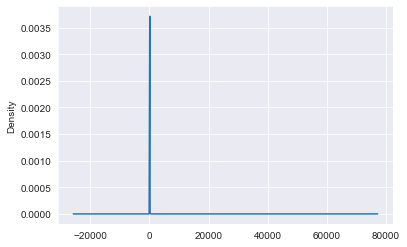

In [15]:
title_basics_df['runtime_minutes'].plot(kind = 'kde')

 I will replace the null values with the median of the column because the data has significant outliers that might skew the mean.

In [16]:
#Replacing nulls with the median in the runtime_minutes columns.
title_basics_df['runtime_minutes'] = title_basics_df['runtime_minutes'].fillna(title_basics_df['runtime_minutes'].median())
title_basics_df['runtime_minutes'].isnull().sum()

0

From the kde plot above wwe can clearly see that the data clearly has significant outliers, lets find a way to dea with all the outliers

# Dealing  with outliers

<AxesSubplot:>

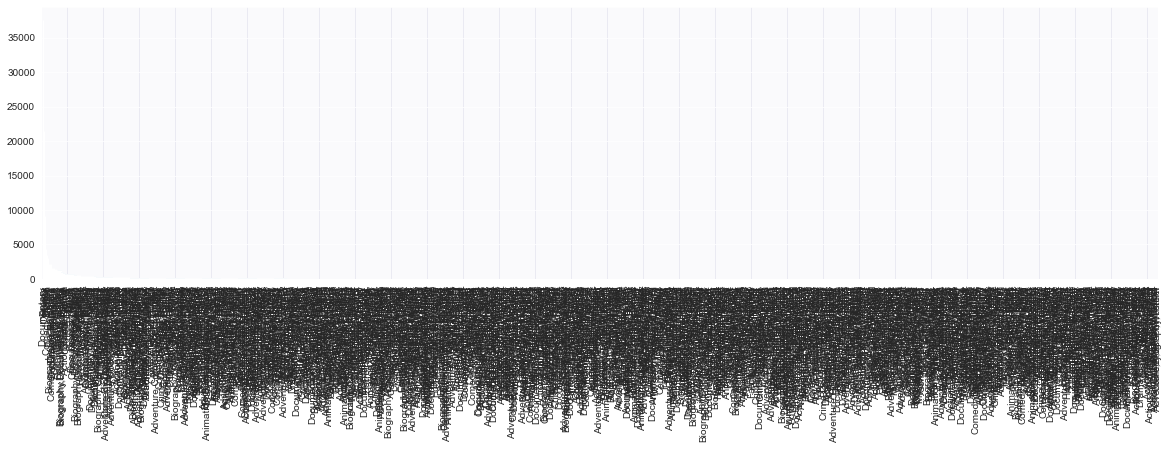

In [17]:
#The Genres column
title_basics_df['genres'].value_counts().plot(kind='bar', figsize=(20, 5))

Since there are so many categorical values, I will retain the outliers

<AxesSubplot:ylabel='Density'>

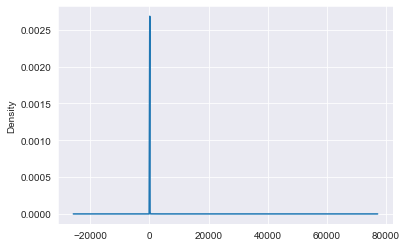

In [18]:
#Dealing ewith outliers in the title_basics_df['runtime_minutes']
title_basics_df['runtime_minutes'].plot(kind = 'kde')

In [19]:
#Detecting and dropping outliers in this column
Q1 = np.percentile(title_basics_df['runtime_minutes'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(title_basics_df['runtime_minutes'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", title_basics_df['runtime_minutes'].shape)
 
# Upper bound
upper = np.where(title_basics_df['runtime_minutes'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(title_basics_df['runtime_minutes'] <= (Q1-1.5*IQR))
 
#Removing the Outliers 
title_basics_df.drop(upper[0], inplace = True)
title_basics_df.drop(lower[0], inplace = True)
 
print("New Shape: ", title_basics_df.shape)

Old Shape:  (146144,)
New Shape:  (131349, 4)


<AxesSubplot:ylabel='Density'>

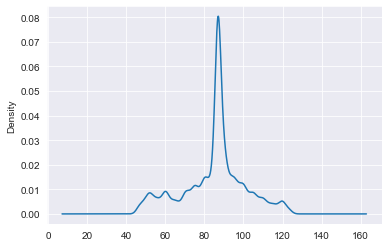

In [20]:
title_basics_df['runtime_minutes'].plot(kind = 'kde')

In [21]:
title_basics_df.columns

Index(['tconst', 'primary_title', 'runtime_minutes', 'genres'], dtype='object')

In [22]:
title_basics_df.isnull().sum()

tconst             0
primary_title      0
runtime_minutes    0
genres             0
dtype: int64

# Analysing the movie_budget_df dataframe

In [23]:
movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


* From the movie_budget_df dataframe i will require all the columns

In [24]:
movie_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [25]:
#Checking for missing values
movie_budget_df.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

There are no missing values
* So I will drop the id column I don't quite need it now
* To find whether or not movies are profitable i will first have to change the domestic_gross, worldwide_gross and production budget columns into numeric values. Then subtract the gross incme fromthe production budget.

In [26]:
movie_budget_df.drop('id', axis = 1, inplace= True)
movie_budget_df.columns

Index(['release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [27]:
#Removing the $ sign from the columns with gross income
movie_budget_df['production_budget'] = movie_budget_df['production_budget'].map(lambda x: x.lstrip('$'))
movie_budget_df['domestic_gross'] = movie_budget_df['domestic_gross'].map(lambda x: x.lstrip('$'))
movie_budget_df['worldwide_gross'] = movie_budget_df['worldwide_gross'].map(lambda x: x.lstrip('$'))

#Removing the commas
movie_budget_df['production_budget'] = movie_budget_df['production_budget'].map(lambda x: x.replace(',', ''))
movie_budget_df['domestic_gross'] = movie_budget_df['domestic_gross'].map(lambda x: x.replace(',', ''))
movie_budget_df['worldwide_gross'] = movie_budget_df['worldwide_gross'].map(lambda x: x.replace(',', ''))


#Converting the values from columns with gross income to int
movie_budget_df['production_budget']= movie_budget_df['production_budget'].astype('int64')
movie_budget_df['domestic_gross'] = movie_budget_df['domestic_gross'].astype('int64')
movie_budget_df['worldwide_gross'] = movie_budget_df['worldwide_gross'].astype('int64')




In [28]:
movie_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   int64 
 4   worldwide_gross    5782 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 226.0+ KB


# Finding the profit from movie production

I will find the profit by subtracting the budget amount from a sum of the worldwide and domestic gross income

In [29]:
movie_budget_df['profits'] = movie_budget_df['production_budget'] - (movie_budget_df['domestic_gross'] + movie_budget_df['worldwide_gross'])
movie_budget_df['profits'].value_counts()

 1000000      23
 2000000      21
 500000       20
 5000000      15
 3000000      15
              ..
-233407396     1
 8133905       1
 3618990       1
-104238357     1
-569997313     1
Name: profits, Length: 5497, dtype: int64

In [30]:
#More columns 
movie_budget_df['domestic_profits'] = movie_budget_df['production_budget'] - (movie_budget_df['domestic_gross'])
movie_budget_df['worldwide_profits'] = movie_budget_df['production_budget'] - (movie_budget_df['worldwide_gross'])


# Merging my movie_budget_df dataset to my column containing genres

In [31]:
movie_budget_df.columns

Index(['release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'profits', 'domestic_profits', 'worldwide_profits'],
      dtype='object')

In [32]:
title_basics_df.columns

Index(['tconst', 'primary_title', 'runtime_minutes', 'genres'], dtype='object')

In [33]:
#Renaming the primary title column in the title_basics_df so that we can have the same column

title_basics_df.rename(columns = {'primary_title': 'movie'}, inplace= True)


In [34]:
#Merging the columns

new_df = pd.merge(title_basics_df, movie_budget_df, on= 'movie')

new_df.head()

,tconst,movie,runtime_minutes,genres,release_date,production_budget,domestic_gross,worldwide_gross,profits,domestic_profits,worldwide_profits
0,tt0249516,Foodfight!,91.0,"Action,Animation,Comedy","Dec 31, 2012",45000000,0,73706,44926294,45000000,44926294
1,tt0293429,Mortal Kombat,87.0,"Action,Adventure,Fantasy","Aug 18, 1995",20000000,70433227,122133227,-172566454,-50433227,-102133227
2,tt0326592,The Overnight,88.0,Documentary,"Jun 19, 2015",200000,1109808,1165996,-2075804,-909808,-965996
3,tt3844362,The Overnight,79.0,"Comedy,Mystery","Jun 19, 2015",200000,1109808,1165996,-2075804,-909808,-965996
4,tt0337692,On the Road,124.0,"Adventure,Drama,Romance","Mar 22, 2013",25000000,720828,9313302,14965870,24279172,15686698


In [35]:
new_df.isnull().sum()

tconst               0
movie                0
runtime_minutes      0
genres               0
release_date         0
production_budget    0
domestic_gross       0
worldwide_gross      0
profits              0
domestic_profits     0
worldwide_profits    0
dtype: int64

Now that the length of the genres column has reduced  I can investigate it

In [36]:
new_df['genres'].value_counts()

Drama                           450
Documentary                     315
Comedy                          136
Comedy,Drama                     92
Horror                           91
                               ... 
Adventure,Drama,Western           1
Documentary,Drama,Reality-TV      1
Adventure,Fantasy,Horror          1
Comedy,Drama,Thriller             1
Adventure,Comedy,Sci-Fi           1
Name: genres, Length: 325, dtype: int64

In [37]:
new_df['genres'].unique()[-10]

'Horror,Romance'

From the above cell i notice the genres a lot of genre descriptions that combine more than one genre .In order to make the definate for analysis i chose to limit the genres to only the first item is used as its genre description for easier analysis

In [38]:
new_df['genres'] = new_df['genres'].str.split(',').str[0]
new_df['genres'].value_counts()

Drama          849
Action         575
Comedy         530
Documentary    379
Horror         220
Adventure      217
Crime          150
Biography      147
Thriller        76
Animation       34
Sci-Fi          28
Fantasy         21
Family          21
Mystery         18
Romance         18
Music            9
Western          8
Musical          4
War              3
Sport            3
Name: genres, dtype: int64

In [39]:
new_df.columns

Index(['tconst', 'movie', 'runtime_minutes', 'genres', 'release_date',
       'production_budget', 'domestic_gross', 'worldwide_gross', 'profits',
       'domestic_profits', 'worldwide_profits'],
      dtype='object')

In [40]:
#The most profitable movie:
most_profitable_movie = new_df[new_df['profits'] == new_df['profits'].max()][['movie', 'genres', 'profits', 'domestic_profits', 'worldwide_profits']]
most_profitable_movie

,movie,genres,profits,domestic_profits,worldwide_profits
3183,Dark Phoenix,Action,157475300,307237650,200237650


In [41]:
least_profitable_movie = new_df[new_df['profits'] == new_df['profits'].min()][['movie', 'genres', 'profits', 'domestic_profits', 'worldwide_profits']]
least_profitable_movie 




,movie,genres,profits,domestic_profits,worldwide_profits
1485,Avatar,Horror,-3111852904,-335507625,-2351345279


Since I am only interested in profits for this part of the analysis i will drop the columns with -ve values for easier plotting of values

In [42]:
new_df_filtered = new_df[new_df['profits'] < 0].index 
new_df.drop(new_df_filtered, inplace = True)

new_df['profits'].min()

1400

I will  also divide the numerical columns by 10**7 for easier plotting.


In [43]:
new_df['profits'] = new_df['profits'] / 10**7
new_df['domestic_profits'] = new_df['domestic_profits'] / 10**7
new_df['worldwide_profits'] = new_df['worldwide_profits'] / 10**7

In [44]:
new_df = new_df.sort_values(by=['profits'], ascending=False)


In [45]:
new_df['profits'].min()

0.00014

# PLOTS

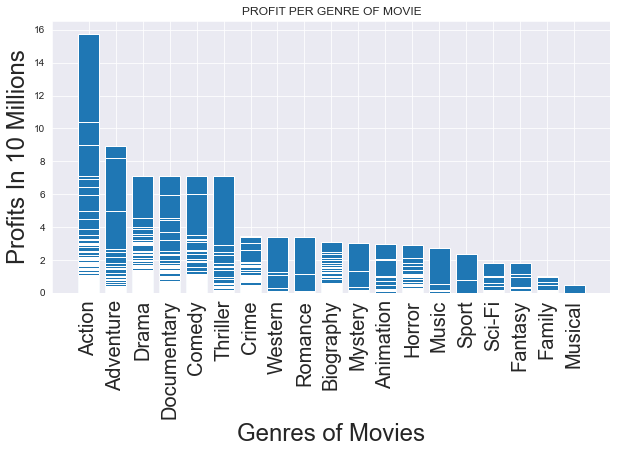

In [46]:
fig = plt.figure(figsize=(10, 5))

# Horizontal Bar Plot

plt.bar(new_df['genres'], new_df['profits'])

plt.xlabel('Genres of Movies', fontsize = 24)
plt.xticks(rotation = 90, fontsize= 20)
plt.ylabel("Profits In 10 Millions", fontsize =24)
plt.title('PROFIT PER GENRE OF MOVIE')

plt.show()
 


# Most profitable genres in the in the domestic and foreign markets.

In [47]:
new_df.columns

Index(['tconst', 'movie', 'runtime_minutes', 'genres', 'release_date',
       'production_budget', 'domestic_gross', 'worldwide_gross', 'profits',
       'domestic_profits', 'worldwide_profits'],
      dtype='object')

In [48]:
new_df['domestic_profits']

3183    30.723765
2197    10.690000
3059     9.000000
635     12.860724
3229     8.200000
          ...    
1939     0.003969
1940     0.003969
3185     0.000947
3249     0.000700
1985     0.000140
Name: domestic_profits, Length: 1168, dtype: float64

# Plotting the genre with highest domestic profits

Text(0.5, 1.0, 'GENRES PLOTTED AGAINST THE DOMESTIC PROFITS')

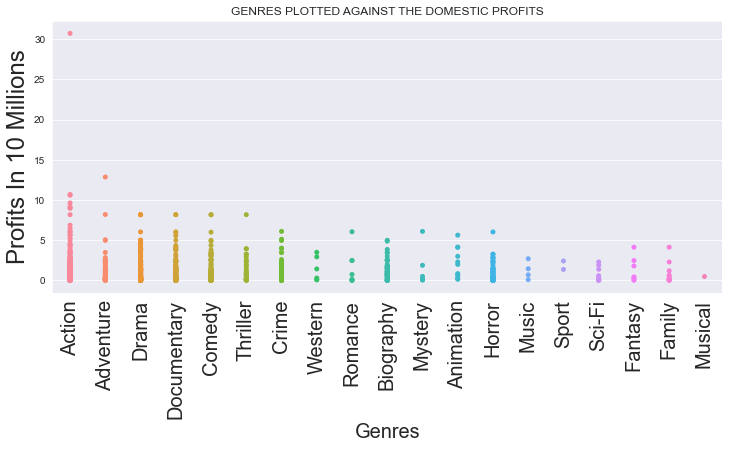

In [49]:
#I will first slice onlythe columns I need
f, ax= plt.subplots(figsize=(12, 5))

sns.stripplot(x = 'genres', y ='domestic_profits', data = new_df, jitter = False)

plt.xticks(rotation = 90, fontsize = 20)
plt.xlabel('Genres', fontsize = 20)
plt.ylabel("Profits In 10 Millions", fontsize =24)
plt.title('GENRES PLOTTED AGAINST THE DOMESTIC PROFITS')


# Plotting the genre with highest worldwide profits

Text(0.5, 1.0, 'GENRES PLOTTED AGAINST THE WORLDWIDE PROFITS')

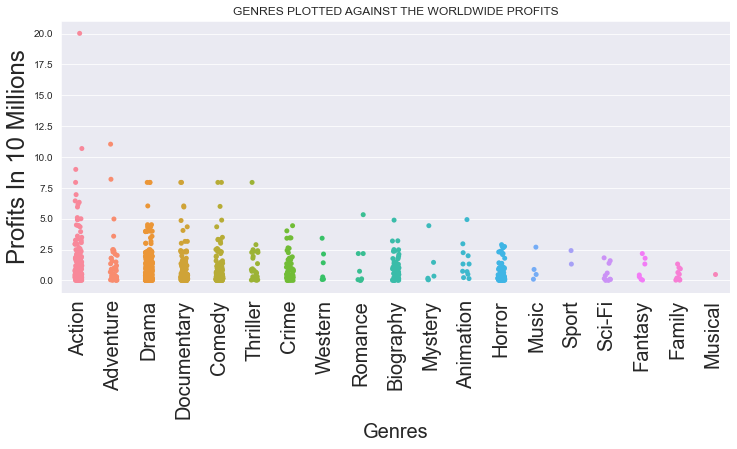

In [50]:
f, ax= plt.subplots(figsize=(12, 5))

sns.stripplot(x = 'genres', y ='worldwide_profits', data = new_df, jitter = True)

plt.xticks(rotation = 90, fontsize = 20)
plt.xlabel('Genres', fontsize = 20)
plt.ylabel("Profits In 10 Millions", fontsize =24)
plt.title('GENRES PLOTTED AGAINST THE WORLDWIDE PROFITS')





# 2nd Problem Statement: Is there any relationship between the month a movie is released with profits made.Should we target a specific season when releasing movie. 

In [51]:
new_df.columns

Index(['tconst', 'movie', 'runtime_minutes', 'genres', 'release_date',
       'production_budget', 'domestic_gross', 'worldwide_gross', 'profits',
       'domestic_profits', 'worldwide_profits'],
      dtype='object')

In [52]:
#Convert the release date column to datetime
import calendar
new_df['release_date'] = pd.to_datetime(new_df['release_date'])
new_df['release_month'] = new_df['release_date'].dt.month
new_df['release_month'] = new_df['release_month'].apply(lambda x: calendar.month_abbr[x])
new_df['release_month'].unique()

array(['Jun', 'Dec', 'Mar', 'Feb', 'Apr', 'Nov', 'Oct', 'Sep', 'Jul',
       'Jan', 'May', 'Aug'], dtype=object)

Text(0.5, 1.0, 'PLOTTING MONTH OF RELEASE AGAINST THE PROFITS GAINED')

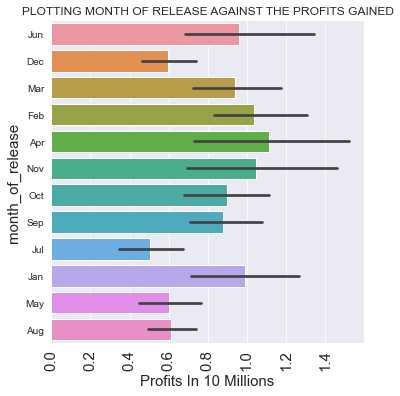

In [53]:
#Plotting profits against the release month



sns.factorplot(y ='release_month', x = 'profits', data = new_df, kind ='bar')
plt.xticks(rotation = 90, fontsize = 15)
plt.ylabel('month_of_release', fontsize = 15)
plt.xlabel("Profits In 10 Millions", fontsize = 15)

plt.title('PLOTTING MONTH OF RELEASE AGAINST THE PROFITS GAINED')



#  3rd problem statement :Is there a relationship between the lenth of a movie and the profits it accrues

In [54]:
new_df.columns

Index(['tconst', 'movie', 'runtime_minutes', 'genres', 'release_date',
       'production_budget', 'domestic_gross', 'worldwide_gross', 'profits',
       'domestic_profits', 'worldwide_profits', 'release_month'],
      dtype='object')

In [55]:
new_df.describe()

,runtime_minutes,production_budget,domestic_gross,worldwide_gross,profits,domestic_profits,worldwide_profits
count,1168.000000,1.168000e+03,1.168000e+03,1.168000e+03,1168.000000,1168.000000,1168.000000
mean,91.839897,1.416137e+07,1.876225e+06,3.926913e+06,0.835823,1.228514,1.023446
std,14.564311,2.135202e+07,4.435180e+06,8.955405e+06,1.266957,1.824018,1.481922
min,46.000000,1.400000e+03,0.000000e+00,0.000000e+00,0.000140,0.000140,0.000140
25%,87.000000,1.500000e+06,0.000000e+00,0.000000e+00,0.100000,0.141605,0.128654
50%,90.000000,6.000000e+06,2.452000e+04,2.440120e+05,0.372266,0.563454,0.499170
75%,101.000000,1.800000e+07,1.069364e+06,4.065020e+06,1.074102,1.593989,1.362724
max,124.000000,3.500000e+08,4.276235e+07,1.497624e+08,15.747530,30.723765,20.023765


In [56]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 3183 to 1985
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   tconst             1168 non-null   object        
 1   movie              1168 non-null   object        
 2   runtime_minutes    1168 non-null   float64       
 3   genres             1168 non-null   object        
 4   release_date       1168 non-null   datetime64[ns]
 5   production_budget  1168 non-null   int64         
 6   domestic_gross     1168 non-null   int64         
 7   worldwide_gross    1168 non-null   int64         
 8   profits            1168 non-null   float64       
 9   domestic_profits   1168 non-null   float64       
 10  worldwide_profits  1168 non-null   float64       
 11  release_month      1168 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 158.6+ KB


In [57]:
new_df = new_df.sort_values(by = ['runtime_minutes', 'profits'], ascending = False)

Text(0.5, 1.0, 'PLOTTING THE DURATION  OF A MOVIE RELEASE AGAINST THE PROFITS GAINED')

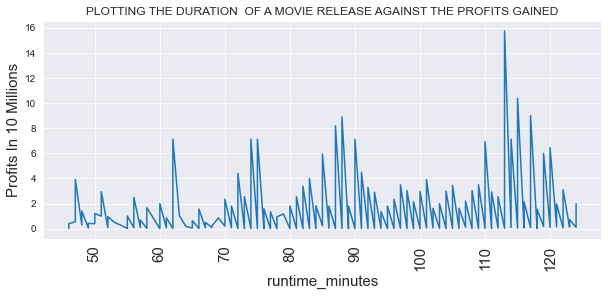

In [58]:
f, ax= plt.subplots(figsize=(10,4))

#sns.pointplot(x ='runtime_minutes', y ='profits', data = new_df)
plt.plot(new_df["runtime_minutes"], new_df["profits"])
plt.xticks(rotation = 90, fontsize = 15)
plt.xlabel('runtime_minutes', fontsize = 15)
plt.ylabel("Profits In 10 Millions", fontsize = 15)

plt.title('PLOTTING THE DURATION  OF A MOVIE RELEASE AGAINST THE PROFITS GAINED')


# conclusions

From the plots above : my recommendations to microsft are:
        
        
I would recommend that Microsoft allocate a larger portion of their budget to producing the following genres Action, Adventure, Drama, Documentary and Comedy


I would encourage them to plan their production so that release dates mostly fall on the winter

Finally I would recommend that they should not limit the length of a movie as it has no bearing on profits made


